# Home Assignment No. 2 - part one

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Task 1. Model and feature selection problem (3 points)

Your goal in this task is to predict the price (```price_doc```) given some characteristics of a house. In order to do that, you will demonstrate your abilities in data preprocessing, finding feature importances, applying different ML models.

### Subproblem 1.1. Data preprocessing and feauture importances (1 point)

The goal of this subproblem is to prepare the data for further usage. Complete all of the following subtasks:

**1.1.1) load the dataset**

In [3]:
### BEGIN Solution (do not delete this comment)
df = pd.read_csv('data_fs.csv')
df.head()
### END Solution (do not delete this comment)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


**1.1.2) preprocess the dataset by dropping the ```timestamp``` feature, filling ```NaN```s with 0, converting the categorical variables into dummy variables**

In [4]:
### BEGIN Solution (do not delete this comment)
df = df.fillna(0)

y = df["price_doc"]
X = df.drop("price_doc", axis=1)
X = X.drop("timestamp", axis=1)

X = pd.get_dummies(X, sparse=True)
### END Solution (do not delete this comment)

**1.1.3) define ```x_train```, ```x_test```, ```y_train```, ```y_test```. The train-test split should be 70:30**


In [5]:
### BEGIN Solution (do not delete this comment)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0xC0FFEE)
X_test.head()
### END Solution (do not delete this comment)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,"child_on_acc_pre_school_3,013","child_on_acc_pre_school_7,311",modern_education_share_0,"modern_education_share_90,92","modern_education_share_93,08","modern_education_share_95,4918",old_education_build_share_0,"old_education_build_share_23,14","old_education_build_share_25,47","old_education_build_share_8,2517"
14052,41,26.0,4.0,5.0,5.0,1962.0,2.0,7.0,2.0,1.050803e+07,...,0,0,0,0,1,0,0,0,1,0
25550,59,0.0,7.0,25.0,2.0,0.0,2.0,1.0,0.0,4.036700e+07,...,0,0,0,0,1,0,0,0,1,0
405,44,28.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.128794e+06,...,0,0,1,0,0,0,1,0,0,0
17451,32,21.0,6.0,9.0,5.0,1964.0,1.0,5.0,2.0,8.659075e+06,...,0,0,0,0,1,0,0,0,1,0
13393,60,0.0,11.0,25.0,1.0,0.0,2.0,1.0,0.0,4.036700e+07,...,1,0,0,1,0,0,0,1,0,0



**1.1.4) plot the histogram of y values. Note that the mean of these values is very high and the distribution of the values is far from normal. Create ```y_train_log``` and ```y_test_log``` by applying $log_{y}$. Now plot the new histogram of the obtained values. You should use these log values for the next subtasks.**   

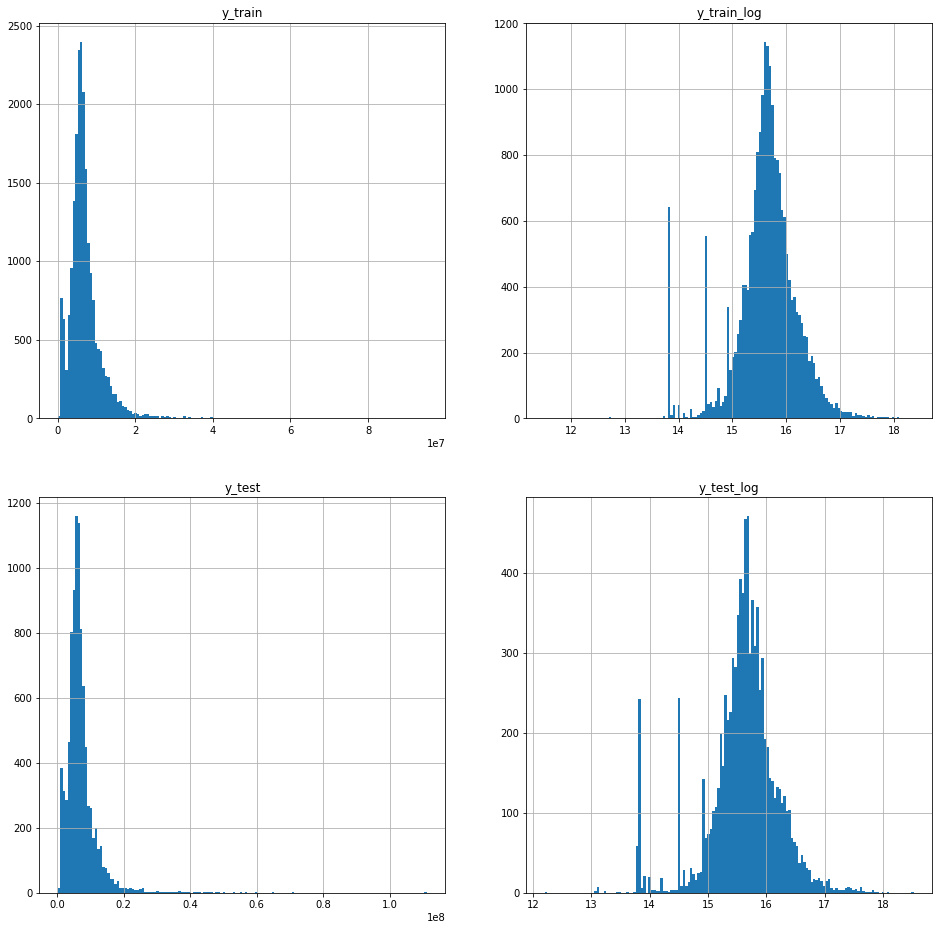

In [6]:
### BEGIN Solution (do not delete this comment)

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 16))
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_vals = [y_train, y_train_log, y_test, y_test_log]
name = ["y_train", "y_train_log", "y_test", "y_test_log"]

for ax, val, n in zip(axes.flat, y_vals, name):
    plt.subplot(ax)
    plt.title(n)
    plt.grid()
    plt.hist(val, bins=150)

### END Solution (do not delete this comment)

**1.1.5) print the number of features in the created ```x_train``` and ```x_test``` datasets. Answer the question: do you think all of these features are relevant for the adequate price prediction?**


In [7]:
### BEGIN Solution (do not delete this comment)

print("x_train shape: {}".format(X_train.shape))
print("x_test shape: {}".format(X_test.shape))

### END Solution (do not delete this comment)

x_train shape: (21329, 560)
x_test shape: (9142, 560)


**Your text answer (do not delete this comment)**:

Not all features would be relevant, since their are 560 features for just one output variable so interdependence and redundant features are bound to be present

**1.1.6) use random forest to find the importance of the features. Plot the histogram of the importances.**

(array([480.,  62.,  10.,   3.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.00289173, 0.00578346, 0.00867518, 0.01156691,
        0.01445864, 0.01735037, 0.02024209, 0.02313382, 0.02602555,
        0.02891728, 0.03180901, 0.03470073, 0.03759246, 0.04048419,
        0.04337592, 0.04626765, 0.04915937, 0.0520511 , 0.05494283,
        0.05783456, 0.06072628, 0.06361801, 0.

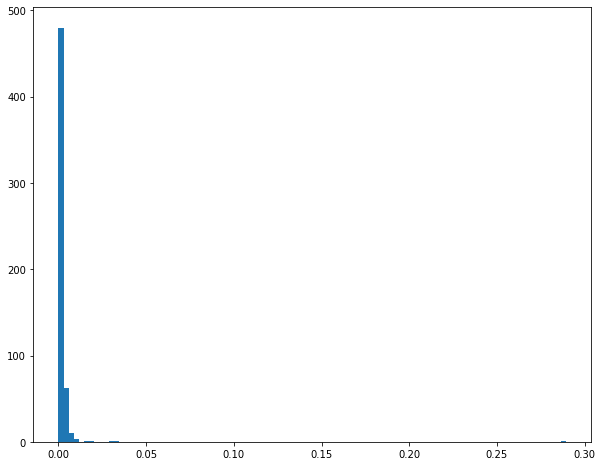

In [8]:
### BEGIN Solution (do not delete this comment)

from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=15, random_state=0)
clf.fit(X_train, y_train_log)

features = X_train.columns
imp = clf.feature_importances_
idx = np.argsort(imp) 

plt.figure(figsize=(10, 8))
plt.hist(imp, bins=100)
### END Solution (do not delete this comment)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.1.7) print the names of the 20 most important features**

In [10]:
### BEGIN Solution (do not delete this comment)

idx = np.argsort(imp)[::-1][:20]
important_features = features[idx][-20:]
print(important_features)
### END Solution (do not delete this comment)

Index(['full_sq', 'num_room', 'cafe_count_2000', 'sport_count_3000',
       'cafe_count_5000_price_2500', 'cafe_count_3000', 'cafe_count_5000',
       'metro_km_avto', 'metro_min_avto', 'micex_cbi_tr', 'ttk_km',
       'detention_facility_km', 'kindergarten_km', 'exhibition_km',
       'sport_count_2000', 'big_church_km', 'big_road1_km', 'brent',
       'public_healthcare_km', 'cafe_count_5000_price_high'],
      dtype='object')


<br>

### Subproblem 1.2. Training models on the most important features (1 point)

In this subproblem, you will train several ML models on the found 20 most important features: train **Linear Regression**,  **Ridge regression**, **Random forest**,  **DecisionTree** and evaluate their performance using the Root Mean Squared Logarithmic Error (RMSLE) on both train/test sets. 

You will have to repeat the same actions in the next tasks too, so we recommend to implement
a dedicated function for comparisons, which
1. on input takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)`;
2. it trains **all of the listed models** on the `(X_train, y_train)` sample;
3. it computes and returns a table with the RMSLE score of each fitted model on the train and test datasets.

**1.2.1) Implement the function described above**

In [11]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [12]:
### BEGIN Solution (do not delete this comment)

def train(X_train, y_train, X_test, y_test):
    clfs = [LinearRegression(), 
            Ridge(random_state = 0), 
            Lasso(random_state = 0),
            DecisionTreeRegressor(random_state = 0),
            RandomForestRegressor(max_depth=10, n_estimators=20, random_state = 0)]        
    train_er = []
    test_er = []
    
    for clf in clfs:
        clf.fit(X_train, y_train)
        y_ = clf.predict(X_train)
        train_error = mse(y_train, y_)
        train_er.append(train_error)
        Y_ = clf.predict(X_test)
        test_error = mse(y_test, Y_)
        test_er.append(test_error)
        
    return train_er, test_er

### END Solution (do not delete this comment)

**1.2.2) Apply the implemented function to our dataset (use only the 20 most important features)**

In [13]:
### BEGIN Solution

regressors = ["Linear Regression", "Lasso", "Ridge", "Dtree", "RFR"]
train_arr, test_arr = train(X_train[important_features], 
                            y_train_log, 
                            X_test[important_features], 
                            y_test_log)
pd.DataFrame({"Methods": regressors,
              "Train loss": train_arr,
              "Test loss": test_arr
})

### END Solution

,Methods,Train loss,Test loss
0,Linear Regression,0.279065,0.289080
1,Lasso,0.279065,0.289079
2,Ridge,0.323418,0.328066
3,Dtree,0.000019,0.440428
4,RFR,0.157245,0.237478


<br>

### Subproblem 1.3. Forward-backward methods (1 point)
In the subproblems above, we have relied on the feature importances found by the random forest method. The main goal of this subproblem is to find feature importances by applying the forward-backward methods: the main idea is to add or remove features and compute how this removal influences the value of the loss function or some other criteria.

The decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

In subtasks, 1.3.1 - 1.3.3, implement the following greedy feature selection algorithm with early stopping using the mean of the RMSLE scores achieved on the 3-fold cross-validation. Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is** and look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html) for more information.

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unused* features and use $k$-fold 
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

**1.3.1) In the cell below, you have to implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure the model's "quality".** 

In [14]:
from sklearn.metrics import make_scorer

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """
    
    scores = {}
    
    ### BEGIN Solution

    shadow = np.ones(X.shape[1])
    shadow[used_features] = 0
    unused_features, = np.nonzero(shadow)

    scorer = make_scorer(mean_squared_log_error, squared=False)

    for id in unused_features:

        used_features.append(id)
        X_train = X.iloc[:, used_features]

        score = cross_val_score(model, X_train, y, scoring=scorer, cv=cv, n_jobs=-1)
        scores[id] = score.mean()

        used_features.pop()

    ### END Solution

    return scores

**1.3.2) Implement a forward greedy feature selection function (the one described in the pseudocode in subtask 1 above) that would**

**- compute the model's "quality" over the currently *unused* features**

**- find the feature, which has given the best score and add it to the list of the currently *used* features**

**- if the model's quality has increased since the last round, add this feature to the list of the best features and  print the best score and the current best features list**

**Do not forget to implement the early stopping.**

In [15]:
def forward_steps(X, y, n_rounds, model):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        model: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """
    
    feat_best_list = []

    ### BEGIN Solution

    round_cnt = 0
    curr_score = np.inf

    while round_cnt < n_rounds:

        round_cnt += 1

        scores = selection_step(model, X, y, feat_best_list)

        best_feat_id = min(scores, key=scores.get)

        if curr_score > scores[best_feat_id]:
            feat_best_list.append(best_feat_id)

            round_cnt = 0
            curr_score = scores[best_feat_id]

            print(scores[best_feat_id])
            print(feat_best_list)

    ### END Solution
    
    return feat_best_list


**1.3.3) Use the function implemented above + DecisionTreeRegressor to get the best features according to this algorithm. (HINT: Use ```n_rounds = 2```)**

In [16]:
### BEGIN Solution

model = DecisionTreeRegressor(random_state=0)
best_features = forward_steps(X_train, y_train_log, 2 , model)
print('best features indices: {}'.format(best_features))

### END Solution

0.03223340631506934
[0]
0.030980806595468664
[0, 544]
0.03075883022436106
[0, 544, 444]
0.030648776634129002
[0, 544, 444, 552]
0.030554773779440936
[0, 544, 444, 552, 475]
0.03050350651831765
[0, 544, 444, 552, 475, 468]
0.030457520930947404
[0, 544, 444, 552, 475, 468, 401]
0.03041676732280062
[0, 544, 444, 552, 475, 468, 401, 459]
0.030376188295751966
[0, 544, 444, 552, 475, 468, 401, 459, 405]
0.03035477055330792
[0, 544, 444, 552, 475, 468, 401, 459, 405, 515]
0.03032882730757309
[0, 544, 444, 552, 475, 468, 401, 459, 405, 515, 509]
0.03031563462960746
[0, 544, 444, 552, 475, 468, 401, 459, 405, 515, 509, 375]
0.03030730023213112
[0, 544, 444, 552, 475, 468, 401, 459, 405, 515, 509, 375, 469]
0.030296085860130145
[0, 544, 444, 552, 475, 468, 401, 459, 405, 515, 509, 375, 469, 473]
0.030287489259770106
[0, 544, 444, 552, 475, 468, 401, 459, 405, 515, 509, 375, 469, 473, 466]
0.030277894929520894
[0, 544, 444, 552, 475, 468, 401, 459, 405, 515, 509, 375, 469, 473, 466, 442]
0.030270

**1.3.4) Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE scores using these features. Remember the function you wrote earlier.**

In [17]:
### BEGIN Solution

forward_features = X_train.iloc[:, best_features].columns._data.tolist()
train_arr, test_arr = train(X_train[forward_features], y_train_log, X_test[forward_features], y_test_log)
pd.DataFrame({"Methods": regressors,
              "Train loss": train_arr,
              "Test loss": test_arr
})


### END Solution

,Methods,Train loss,Test loss
0,Linear Regression,0.301579,0.304746
1,Lasso,0.301581,0.304707
2,Ridge,0.339881,0.346078
3,Dtree,0.211302,0.261530
4,RFR,0.218673,0.250640


<br>

## Task 2. Multi-Class Classification Strategies (1 point)
In this task, you will deal with the multiclass classification problem for the Glass Classification Data. Let's load the dataset.

In [18]:
data = pd.read_csv('glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00,2
133,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15,2
76,1.51645,13.44,3.61,1.54,72.39,0.66,8.03,0.00,0.00,2
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7


The features of each glass object correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to these algorithms. More precisely, for every pair (algorithm, approach) you are to perform a 5-fold cross-validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own. 

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross-validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without a significant increase in computation time?

In [19]:
### BEGIN Solution (do not delete this comment)

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

clfs = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(max_depth=5, random_state=0)
]
options = [1, 2, 3]

labels = ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier']

scores = {}
time = {}
scorer = make_scorer(balanced_accuracy_score)

for op in options:    
    for clf, lab in zip(clfs, labels):
        if op is 1:
            result = cross_validate(clf, X, y, scoring=scorer, cv=5)
        elif op == 2:
            result = cross_validate(OneVsRestClassifier(clf), X, y, scoring=scorer, cv=5)
        elif op == 3:
            result = cross_validate(OneVsOneClassifier(clf), X, y, scoring=scorer, cv=5)            
        
        if lab in scores and lab in time:
            scores[lab].append(np.mean(result['test_score']))
            time[lab].append(np.mean(result['fit_time']))

        else:
            scores[lab] = [np.mean(result['test_score'])]
            time[lab] = [np.mean(result['fit_time'])]   


scores = pd.DataFrame(data=scores, index = ['Multiclass', 'OneVsRest', 'OneVsOne'])
time = pd.DataFrame(data=time, index = ['Multiclass', 'OneVsRest', 'OneVsOne'])
print('Cross Validation Scores: '.format(display(scores)))
print('Training Duration (CV=5): '.format(display(time)))



### END Solution (do not delete this comment)

,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,DecisionTreeClassifier
Multiclass,0.445040,0.700873,0.551071,0.539008
OneVsRest,0.385298,0.681964,0.575159,0.585952
OneVsOne,0.436925,0.636190,0.554921,0.661944


Cross Validation Scores: 


,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,DecisionTreeClassifier
Multiclass,0.034035,0.161386,0.002324,0.002852
OneVsRest,0.174476,0.892437,0.012747,0.016070
OneVsOne,0.312419,1.947683,0.016165,0.018263


Training Duration (CV=5): 


**Which metric did you choose to optimize during cross validation and why? Explain**

**Your text answer (do not delete this comment)**:

Chosing balanced score accuracy seems to be a good fir because the confusion matrix of the dataset is biased 

**For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without a significant increase in computation time?**

**Your text answer (do not delete this comment)**:

The time difference between OneVSOne and OneVSRest is not significant but OneVSOne outperforms the later in classifier accuracy by a significant amount 

# Task 3. Stacking (2 points)

Stacking is an ensembling approach, which combines several algorithms (base models) to get better results. This is achieved by **a)** training the base models (any ML models) on the initial train data (or parts of the train data, see the paragraph below), **b)** training the meta-model (also an ML model) on the predictions of those base models.

One of the main problems of stacking is overfitting. To avoid it, when evaluating the performance of the meta-model on the train set, the training data is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models. The $ n $ -th fold is used for the overall prediction (calculating the meta-factor) in the following manner: the predictions on the $ n $ -th fold are made by the base models (already trained on the rest of the dataset), then these predictions on the $ n $ -th fold are fed as inputs to the meta-model.

When evaluating the performance of the meta-model on the test set, there can be used various approaches$.^{[1]}$ For example, in order, to obtain meta-factors for the test data, the base classifiers can be retrained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers (once again, as it is said in the paragraph above, if we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained).  

You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.S. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer ([source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning)). Because they are so similar you can use any of them. 

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  

**Your task will be:**

* Complete the ```meta_classfier``` function
* Choose 6 different base models (base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml, features e.t.c) and train them.
* Report individual accuracy on the test set for each of the models.
* Train the metaclassifier (in this case, once again, it is just an ML model) on the original dataset's features, report score on test.
* Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Report the training score of the meta-classifier on the $ n $-th fold. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.
* Does stacking help to gain a better score?

For this task we will use the dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype). Split it train-test - 60/40.
More details about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

In [20]:
from sklearn import datasets
fc = sklearn.datasets.fetch_covtype()

Write meta classifier function.

In [21]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, cross_val_predict

def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv):
    """
    Meta classifier prediction using stacking. 
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators. 
    :param X_train: numpy array or pandas table, train set.
    :param X_test: numpy array or pandas table, target for train set.
    :param X_train: numpy array or pandas table, test set.
    :param cv: number of cross-validation folds.
    
    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_calssifier.
    
    
    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
    
    """
    ### BEGIN Solution (do not delete this comment)

    new_features = []

    for clf in tqdm(base_clfs):

        y_pred = cross_val_predict(clf, X_train, y_train, n_jobs=-1, cv=cv)
        new_features.append(y_pred)

    final_classifier.fit(np.vstack(new_features).T, y_train)

    y_train_final = np.vstack(new_features).T

    y_train_pred = final_classifier.predict(y_train_final)

    new_features = []

    for clf in tqdm(base_clfs):

        clf.fit(X_train, y_train)
        new_features.append(clf.predict(X_test))
    
    y_test_pred = final_classifier.predict(np.vstack(new_features).T)

    ### END Solution (do not delete this comment)
    return y_train_pred, y_test_pred, final_classifier

### Subproblem 3.1 (1 point)

**3.1.1) Chose 6 different base models (base models can be any models that you know,and can differ with each other by different hyperparameters,  models of ml, features e.t.c) and train them.**

In [22]:
### BEGIN Solution (do not delete this comment)
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
x_train, x_test, y_train, y_test = train_test_split(fc.data, fc.target, test_size=0.4, random_state=0)

models_list = [
    LogisticRegression(n_jobs=-1),
    DecisionTreeClassifier(max_depth=8, random_state=0),
    RandomForestClassifier(max_depth=3, random_state=0, n_estimators=100, n_jobs=-1),
    DecisionTreeClassifier(max_depth=5, random_state=0),
    GaussianNB(),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=4, random_state=0), algorithm="SAMME", n_estimators=100)
]

for clf in tqdm(models_list):
    clf.fit(x_train, y_train)

### END Solution (do not delete this comment)

100%|██████████| 6/6 [04:38<00:00, 46.43s/it]


**3.1.2) Report individual scores on test set. As a score use accuracy.**

In [23]:
### BEGIN Solution (do not delete this comment)

from sklearn.metrics import accuracy_score

accuracies = []

for clf in models_list:
    y_pred = clf.predict(x_test)
    accuracies.append(accuracy_score(y_pred, y_test))
    print(f'{type(clf).__name__}:', accuracy_score(y_pred, y_test))

### END Solution (do not delete this comment)

LogisticRegression: 0.617985843678062
DecisionTreeClassifier: 0.7477377853316409
RandomForestClassifier: 0.661083023170758
DecisionTreeClassifier: 0.7026139713001012
GaussianNB: 0.45897893763042963
AdaBoostClassifier: 0.6163077386458983


### Subproblem 3.2 (1 point)

**3.2.1) Train metaclassifier (in this case, once again, it is just an ML model) on original dataset's features. And report score on test.**

In [24]:
### BEGIN Solution (do not delete this comment)

best_clf = models_list[np.argmax(accuracies)]

print(f'{type(best_clf).__name__}:', np.max(accuracies))

final_clf = sklearn.base.clone(best_clf)

### END Solution (do not delete this comment)

DecisionTreeClassifier: 0.7477377853316409


**3.2.2) Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Report the training score of the meta-classifier on the $ n $-th fold. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.**

In [25]:
### BEGIN Solution (do not delete this comment)

y_train_pred, y_test_pred, final_classifier = meta_classifier(models_list, final_clf, x_train, x_test, y_train, cv=3)

print(f'\n\nTrain {type(final_clf).__name__}:', accuracy_score(y_train_pred, y_train))

### END Solution (do not delete this comment)

100%|██████████| 6/6 [05:58<00:00, 59.83s/it] 



Train DecisionTreeClassifier: 0.7512930032959751


**3.2.3) Report score(accuracy) on test.**

In [26]:
### BEGIN Solution (do not delete this comment)

print(f'Test {type(final_clf).__name__}:', accuracy_score(y_test_pred, y_test))

### END Solution (do not delete this comment)

Test DecisionTreeClassifier: 0.7491276005249456


**3.2.4) Does stacking helped to gain a better score?**

**Your text answer (do not delete this comment)**:

Yes, stacking helps to improve the accuracy from .747 to .749 but maybe if I increace the cv it will really increase more. but it takes too much time ) 